# Newton's Law of Gravity

### Import "standard" libraries

In [1]:
# Import libraries first
%matplotlib inline
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import sys, logging, os, re
import time

# import seaborn as sns
import scipy
import scipy.io as sio
from math import pi

***
## Contents

- [Introduction](#Introduction)
- [Newton's law of universal gravitation](#Newton's-law-of-universal-gravitation)
    - [Part 1](#Part-1)
    - [Part 2](#Part-2)
    - [Part 3](#Part-3)
- [Exercise 1](#Exercise-1)
- [Exercise 2](#Exercise-2)
- [Exercise 3](#Exercise-3)
- [Escaping Earth](#Escaping-Earth)

***
## Introduction

* 3rd Cen B.C. - Heliocentric model 
    * First  explicit argument for a Heliocentric model of the Solar System by Greek astronomer and mathematician Aristarchus of Samos.
* 140 A.D. - Epicycles
    * Presentation of  a physical realization of the universe as a set of nested spheres, in which he used the epicycles of his planetary model - by a Greco-Roman mathematician, astronomer Ptolemy of Alexandria. 
* 1543 - Copernicus
    * Sun in the center, planets in circles around the sun
    
* 1600s
    * Tycho Brahe: accurate observations
    * Johannes Kepler: path of planets = ellipsis 
    
* **1686** 
    * ** Sir Isaac Newton on 5 July 1686 published Philosophiæ Naturalis Principia Mathematica ("the Principia"). **
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Prinicipia-title.png/800px-Prinicipia-title.png" width=20%>    
    
***

## Newton's law of universal gravitation

* Every body exerts an attractive force to every other body that is proportional to the mass of the two bodies, and inversively proportional to the square ot the separation distance between the bodies.

* **Modern form:** Every point mass attracts every single other point mass by a force pointing along the line intersecting both points. The force is proportional to the product of the two masses and inversely proportional to the square of the distance between them

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/NewtonsLawOfUniversalGravitation.svg/400px-NewtonsLawOfUniversalGravitation.svg.png">

Equation:
$$ F=G \cdot \frac{m_1 \cdot m_2}{r^2}$$

where $ G=6.67 \cdot 10^{-11} \frac{N \cdot m^2}{kg^2}$ is the Universal Graviational Constant.


source: [Wikipedia](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation)

***


### Part 1

When an object (eg. planet) moves about a force center (eg. Sun) to which it is attracted by a force $F \propto \frac{1}{r^2}$, then the path will be:
* Parabola $\rightarrow$ open orbit (one pass, never again)
* Hyberbola $\rightarrow$ open orbit (one pass, never again)
* Ellipsis $\rightarrow$ close orbit

<center>** $\Rightarrow$ 1st Law of Keper **</center>

In [2]:
x = np.linspace(-9, 9, 400)
y = np.linspace(-5, 5, 400)
x, y = np.meshgrid(x, y)
def axes():
    plt.figure(figsize=(16,8))
    plt.axhline(0, alpha=.5,color='k')
    plt.axvline(0, alpha=.5,color='k')
    plt.axis('equal')
    plt.grid(color='lightgray',linestyle='--')
    plt.xlim([-5,5])
    plt.ylim([-2.5,2.5])


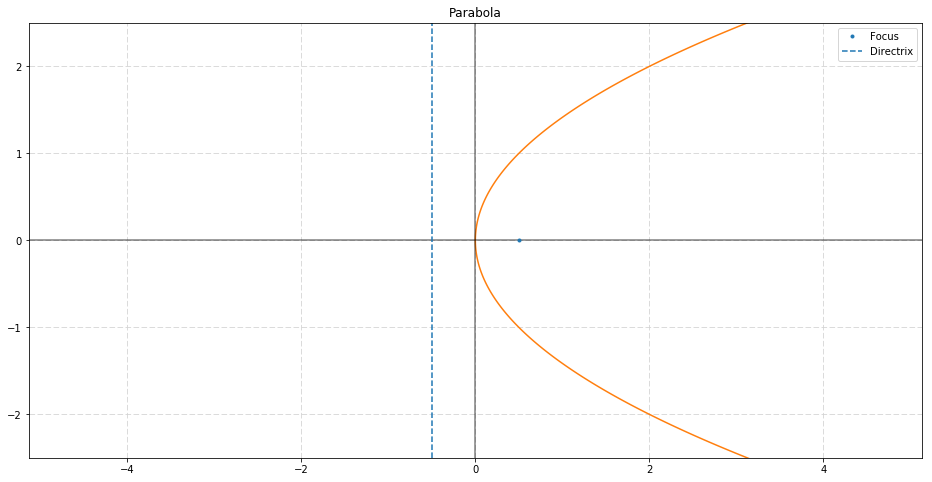

In [3]:
a = .5
axes()
plt.contour(x, y, (y**2 - 4*a*x), [0], alpha=1., colors='#ff7f0e')

# Focus.
plt.plot(a, 0, '.',label='Focus')
# Directrix.
plt.axvline(-a,linestyle='--',label='Directrix')

plt.title("Parabola")
plt.legend()
plt.show()


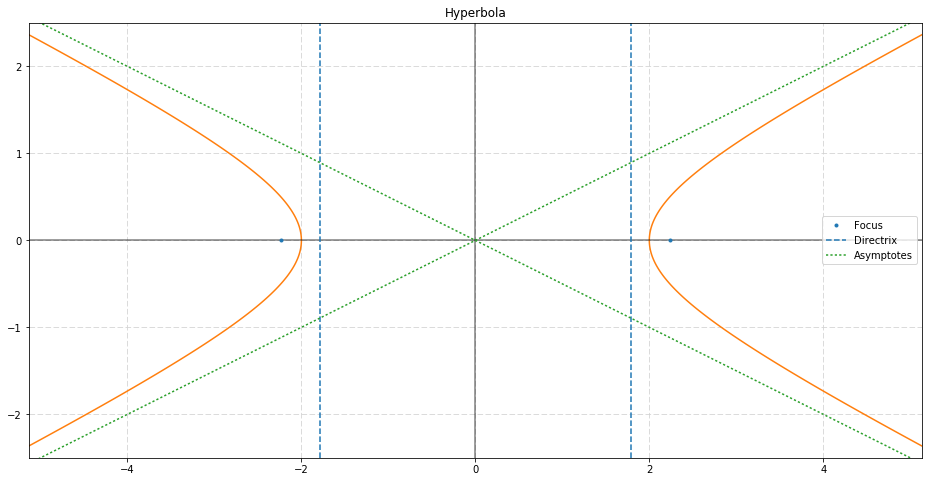

In [4]:
a = 2.
b = 1.
axes()
plt.contour(x, y,(x**2/a**2 - y**2/b**2), [1], colors='#ff7f0e', alpha=1.)
# Eccentricity.
e = np.sqrt(1 + b**2/a**2)
# Foci.
plt.plot(-a*e, 0, '.',color='#1f77b4',label='Focus')
plt.plot(a*e, 0, '.',color='#1f77b4')

# Directrices.
plt.axvline(a/e,linestyle='--',label='Directrix',color='#1f77b4')
plt.axvline(-a/e,linestyle='--',color='#1f77b4')
# Asymptotes.
plt.plot(x[0,:], b/a*x[0,:], ':',label='Asymptotes',color='#2ca02c')
plt.plot(x[0,:], -b/a*x[0,:], ':',color='#2ca02c')


plt.title("Hyperbola")
plt.legend()
plt.show()

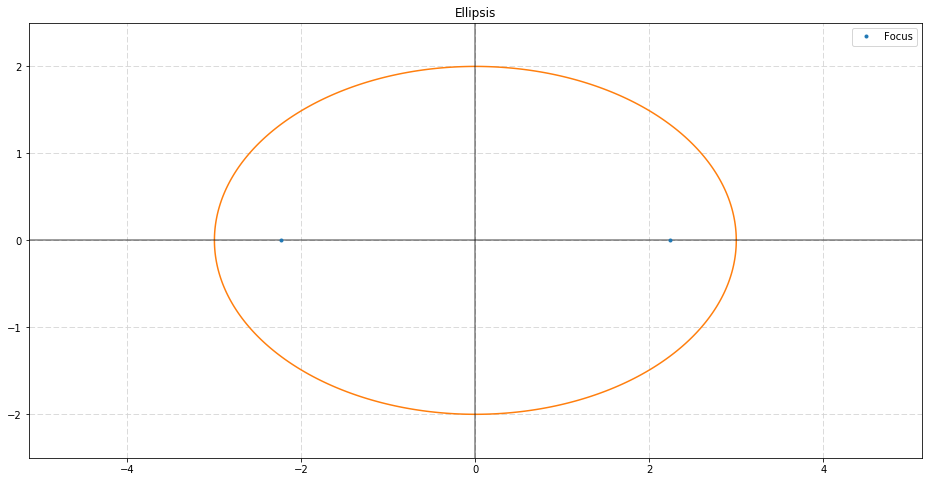

In [5]:
a = 3.
b = 2.
c=np.sqrt(a**2-b**2)
axes()
plt.contour(x, y,(x**2/a**2 + y**2/b**2), [1], colors='#ff7f0e')
plt.plot(-c, 0, '.',color='#1f77b4',label='Focus')
plt.plot(c, 0, '.',color='#1f77b4')

plt.title("Ellipsis")
plt.legend()
plt.show()

***
### Part 2

* **Modern form:** Every point mass attracts every single other point mass by a force **pointing along the line intersecting both points (=central force)**. The force is proportional to the product of the two masses and inversely proportional to the square of the distance between them


* The Force of Gravity - $F_g$ is a central force, hence the net torque -$\tau_{net}$ is zero and the Angular Momentum -$L$ is covserved:

$$\tau_{net}=0 \quad \Rightarrow  L=\text{constant}$$


* Angular Momentum, Inertia, Angular Velocity: $\qquad L= I\cdot \omega = m \cdot r^2 \cdot \omega$
* Perpendicular (Linear) Velocity: $\qquad \qquad \qquad \quad v_p= r \cdot \omega = \frac{\Delta x}{\Delta t}$
* Angular Momentum, Linear Velocity: $\qquad \qquad \quad L= m \cdot r \cdot v_p$

* Angular Momentum, Linear Velocity: $\qquad \qquad \quad \frac{L}{m} =  r \cdot v_p$

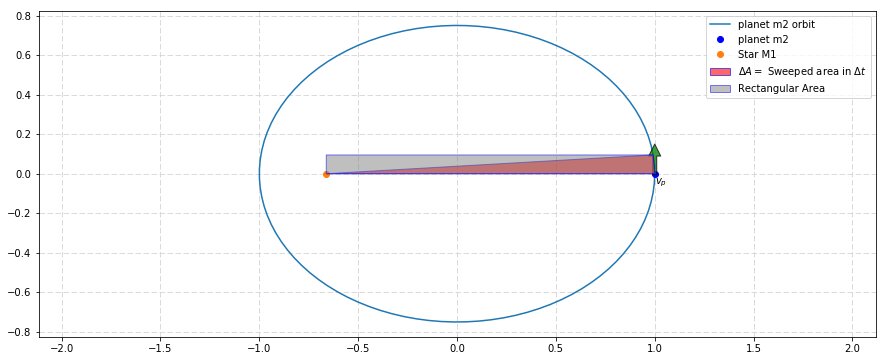

In [6]:
a=1.     #radius on the x-axis
b=0.75   #radius on the y-axis
c=np.sqrt(a**2-b**2)
t = np.linspace(0, 2*pi, 100)
x = a*np.cos(t)
y = b*np.sin(t)

plt.figure(figsize=(15,6))
plt.annotate('$v_p$',xy=(1.,.15), xycoords='data',xytext=(0,-45), textcoords='offset points',
             arrowprops=dict(facecolor='green',alpha=0.75),horizontalalignment='left', verticalalignment='bottom')

plt.plot( x, y ,label='planet m2 orbit')
plt.plot( x[0], y[0] ,'bo',label='planet m2')
plt.plot([-c],[0],'o',label='Star M1')
plt.fill([-c,x[0],x[2],-c],[0,y[0],y[2],0], zorder=10,facecolor='red',alpha=0.6,label='$\Delta A=$ Sweeped area in $\Delta t$',edgecolor='blue')
plt.fill([-c,x[0],x[2],-c],[0,0,y[2],y[2]], zorder=10,facecolor='grey',alpha=0.5,label='Rectangular Area',edgecolor='blue')

plt.grid(color='lightgray',linestyle='--')
plt.legend()
plt.axis('equal')
plt.show()

* $\text{Rectangular Area} = 2 \cdot \text{Sweeped area in } \Delta t$


* $ \qquad \quad r \cdot v_p \cdot \Delta t = 2 \cdot \Delta A $


* $ \qquad \qquad  \quad \Delta A = \frac{1}{2} \cdot  r \cdot v_p \cdot \Delta t  $


* $ \qquad \qquad  \quad  \frac{\Delta A}{\Delta t}=\frac{1}{2} \cdot r \cdot v_p = \frac{1}{2} \cdot \frac{L}{m}=\frac{L}{2m}$ 

$$ \Rightarrow \frac{\Delta A}{\Delta t}=\frac{L}{2m} $$

* If the Angular Momentum -$L$ is constant, then $\frac{\Delta A}{\Delta t}$ is constant as well.

* The planet $m_1$ sweeps equal areas in equal times! <center>** $\Rightarrow$ 2nd Law of Keper **</center>


*** 
### Part 3

* Asssuming motion of a planet of mass - $m_p$ in circular orbit or radius - $r$ around the Sun - $M_{\odot} or M_s$:


* We estimate the centripetal force - $F_{c}$:
$$ F_{c} = \frac{m_p \cdot v^2}{r} $$


* We estimate Newton's gravitational force $F_{g}$
$$ F_{g} = G \cdot \frac{M_{\odot} \cdot m_p}{r^2}$$


* And we equalize them:
$$ F_{g} = F_{c}$$
$$ G \cdot \frac{M_{\odot} \cdot m_p}{r^2}= \frac{m_p \cdot v^2}{r}$$


* We end up with an equation for the velocity:
$$ v^2= \frac{G \cdot M_{\odot}}{r}$$


* From the assumption of circular motion we have another equation for the velocity (as a function of the period -$T$):
$$ v= \frac{2 \cdot \pi \cdot r}{T}$$


* By combining the velocity equations from above:
$$ [ \frac{2 \cdot \pi \cdot r}{T} ]^2=\frac{G \cdot M_{\odot}}{r}$$


* We re-arrange the parameters:
$$ \Rightarrow \frac{4 \cdot \pi^2 \cdot r^2}{T^2} =\frac{G \cdot M_{\odot}}{r}$$


* Finally, we arrived at the final equation:
$$ \Rightarrow T^2 = \frac{4 \cdot \pi^2}{G \cdot M_{\odot}} \cdot r^3$$ 


<center>** $\Rightarrow$ 3rd Law of Keper **</center>

### Exercise 1

Mars has a satellite with a period $T=460$ minutes and a mean orbit of radius $r_s=9.4$ Million miles. What is the mass of Mars - $M_{mars}=?$  

### Exercise 2

What is the free-fall acceleration - $g$ of a body -$m$, which is 200 km above Earth's surface? 

### Exercise 3

A satelliste orbits Earth in a circular orbit. Find its period:
1. if the satellite is just above the surface of the Earth (neglect air resistance)
2. the satellite is at an altitude of 300km (eg. [ISS](https://en.wikipedia.org/wiki/International_Space_Station))

***
## Escaping Earth

* Conservation of Energy:
$$ \frac{1}{2} \cdot m \cdot v^2 = m \cdot g \cdot h $$
$$ v^2 = 2 \cdot g \cdot h $$

* g: gravitational field, assumed to be uniform when close to Earth's surface.


* Newton's Law of Gravity:
$$ F_{g} = G \cdot \frac{M \cdot m}{r^2}$$
$$ g \propto \frac{1}{r^2} $$

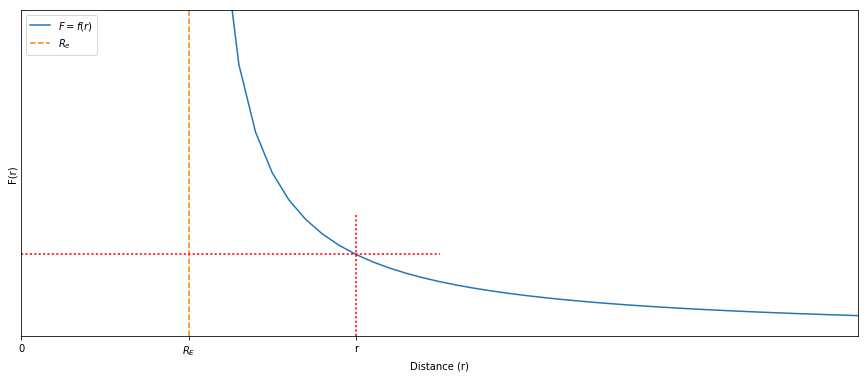

In [19]:
plt.figure(figsize=(15,6))
r=np.linspace(0.1,10,100)
plt.plot(1+r,1/r,label='$F=f(r)$')
plt.plot([1,1],[0,4],'--',label='$R_e$')
plt.plot([2.0,2.0],[0,1.5],'r:')
plt.plot([0,2.5],[1,1],'r:')

plt.xlabel('Distance (r)')
plt.ylabel('F(r)')
plt.xlim(0,5)
plt.ylim(0,4)
plt.tick_params(axis='y',which='both',bottom='off',top='off',right='off',left='off',labelleft='off')

x = [0,1,2]
labels = ['0','$R_E$', 'r']
plt.xticks(x, labels, rotation='horizontal')

plt.legend()
plt.show()